# : - Imports

In [1]:
import sys
import os
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from sklearn.model_selection import train_test_split
from src.models.logistic_model import LogisticModel
from src.models.xgboost_model import XGBoostModel
from src.models.ensemble_model import RandomForestModel
from src.models.evaluator import Evaluator

# : - Load data

In [2]:
df_creditcard = pd.read_csv("../../data/processed/cleaned_credit_data.csv")

# : - Data preparation function

In [3]:
def prepare_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# : - Prepare datasets

#### --- for creditcard  ---

In [4]:
X_train_cc, X_test_cc, y_train_cc, y_test_cc = prepare_data(df_creditcard, "Class")

#   :::::::::: - Train and evaluate on Credit Card Dataset - :::::::::: 

# --- LogisticModel on credit card dataset  ---


--- Evaluation: Logistic Regression ---
AUC-PR: 0.6877
F1 Score: 0.0996
Confusion Matrix:
[[82715  2261]
 [   16   126]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



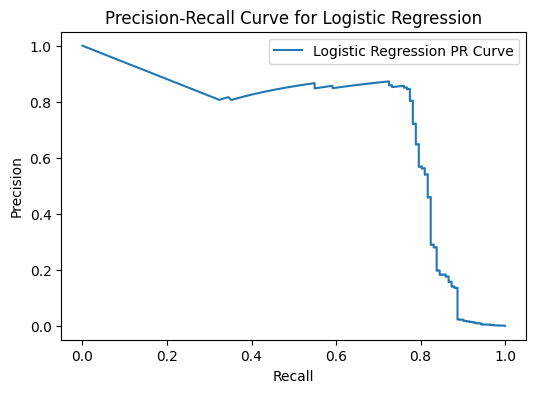

{'auc_pr': np.float64(0.6876864501146239),
 'f1': 0.099644128113879,
 'confusion_matrix': array([[82715,  2261],
        [   16,   126]])}

In [6]:
lr_cc = LogisticModel()
lr_cc.train(X_train_cc, y_train_cc)
Evaluator.evaluate(lr_cc, X_test_cc, y_test_cc)

# --- XGBoostModel credit card dataset ---


--- Evaluation: XGBoost ---
AUC-PR: 0.8036
F1 Score: 0.8333
Confusion Matrix:
[[84964    12]
 [   32   110]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.90      0.77      0.83       142

    accuracy                           1.00     85118
   macro avg       0.95      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



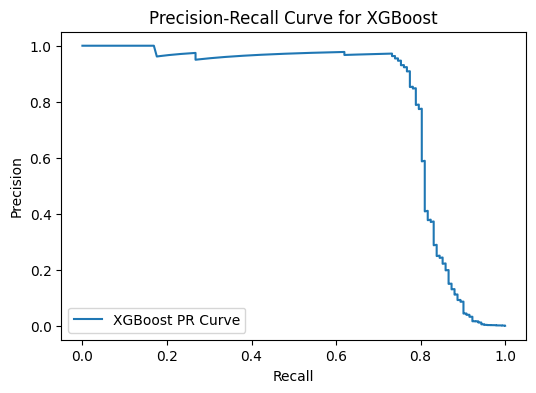

{'auc_pr': np.float64(0.8036026187774917),
 'f1': 0.8333333333333334,
 'confusion_matrix': array([[84964,    12],
        [   32,   110]])}

In [7]:
xgb_cc = XGBoostModel()
xgb_cc.train(X_train_cc, y_train_cc)
Evaluator.evaluate(xgb_cc, X_test_cc, y_test_cc)

# --- RandomForestModel fraud dataset ---


--- Evaluation: Random Forest ---
AUC-PR: 0.8196
F1 Score: 0.8178
Confusion Matrix:
[[84972     4]
 [   41   101]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.71      0.82       142

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



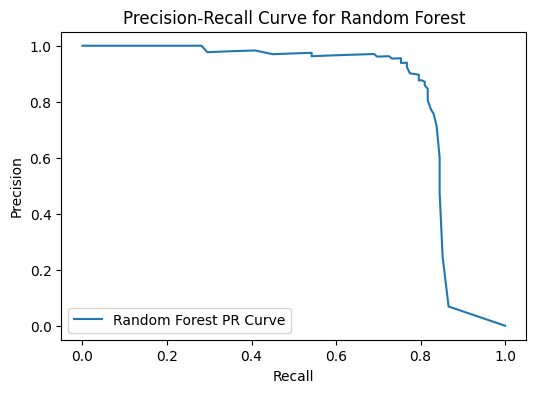

{'auc_pr': np.float64(0.8195903660851698),
 'f1': 0.8178137651821862,
 'confusion_matrix': array([[84972,     4],
        [   41,   101]])}

In [8]:
rf_cc = RandomForestModel()
rf_cc.train(X_train_cc, y_train_cc)
Evaluator.evaluate(rf_cc, X_test_cc, y_test_cc)

## ***  Count the number of instances of each class  **

In [9]:
import numpy as np

# Count the number of instances of each class
neg = np.sum(y_train_cc == 0)  # majority class (non-fraud)
pos = np.sum(y_train_cc == 1)  # minority class (fraud)

print(f"Non-fraud: {neg}, Fraud: {pos}")


Non-fraud: 198277, Fraud: 331


# ***  scale_pos_weight  ***

In [10]:
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 599.02
